# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


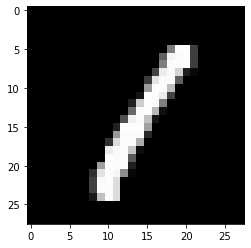

In [134]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[3],cmap="gray")

(60000, 28, 28)


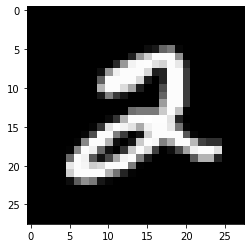

In [135]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[5],cmap="gray")

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [138]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [140]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [141]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(Convolution2D(32,3 , activation='relu'))
#model1.add(Convolution2D(32,3 , activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))

model.add(Convolution2D(32,3 , activation='relu'))
model.add(Convolution2D(32,3 , activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
#model1.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [142]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 9, 9, 32)          9248      
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 7, 7, 32)          9248      
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 7, 7, 10)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [144]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=25, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/25
60000/60000 [==============================] - 26s 439us/step - loss: 0.1553 - acc: 0.9501
Epoch 2/25
60000/60000 [==============================] - 24s 401us/step - loss: 0.0502 - acc: 0.9844
Epoch 3/25
60000/60000 [==============================] - 24s 402us/step - loss: 0.0377 - acc: 0.9885
Epoch 4/25
60000/60000 [==============================] - 24s 402us/step - loss: 0.0309 - acc: 0.9906
Epoch 5/25
60000/60000 [==============================] - 24s 402us/step - loss: 0.0273 - acc: 0.9911
Epoch 6/25
60000/60000 [==============================] - 24s 408us/step - loss: 0.0224 - acc: 0.9931
Epoch 7/25
60000/60000 [==============================] - 24s 401us/step - loss: 0.0192 - acc: 0.9940
Epoch 8/25
60000/60000 [==============================] - 24s 401us/step - loss: 0.0176 - acc: 0.9942
Epoch 9/25
60000/60000 [==============================] - 24s 401us/step - loss: 0.0143 - acc: 0.9953
Epoch 10/25
60000/60000 [==============================] - 24s 401us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [146]:
print(score)

[0.038846943631432485, 0.9929]


In [0]:
y_pred = model.predict(X_test)

In [148]:
print(y_pred[:9])
print(y_test[:9])

[[2.5931720e-28 4.6942361e-26 3.1165208e-18 9.7998685e-20 2.1982486e-33
  6.3022760e-32 0.0000000e+00 1.0000000e+00 2.5536239e-26 1.5132082e-19]
 [4.0776379e-22 2.0372435e-22 1.0000000e+00 9.3013665e-27 3.7090811e-21
  2.7333716e-36 2.9121145e-20 9.7084762e-29 3.3552901e-20 1.6758245e-35]
 [4.3198207e-17 1.0000000e+00 4.1152143e-17 5.6795114e-24 1.7220390e-14
  3.0103286e-18 8.5575977e-16 1.7298046e-14 6.6359529e-14 3.4373411e-17]
 [1.0000000e+00 4.6932017e-24 1.5388481e-15 9.0085210e-20 4.3512331e-22
  1.1885497e-14 2.0942152e-09 2.1348348e-21 2.3787160e-17 4.2408113e-13]
 [5.5215386e-22 3.8448968e-18 1.2638532e-15 2.1245432e-27 1.0000000e+00
  4.0402386e-25 3.1620222e-13 4.8914417e-21 4.4788006e-15 6.9125498e-14]
 [2.5898537e-18 1.0000000e+00 1.7623530e-16 1.7841522e-26 2.2551945e-15
  2.3183204e-23 2.3438358e-20 3.2342598e-14 9.4123486e-17 1.6393686e-17]
 [1.9445669e-37 4.6654458e-16 6.3521671e-24 3.1657065e-26 1.0000000e+00
  1.8718056e-15 2.5914653e-25 1.7523453e-15 6.3685112e-12 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

(1, 28, 28, 1)


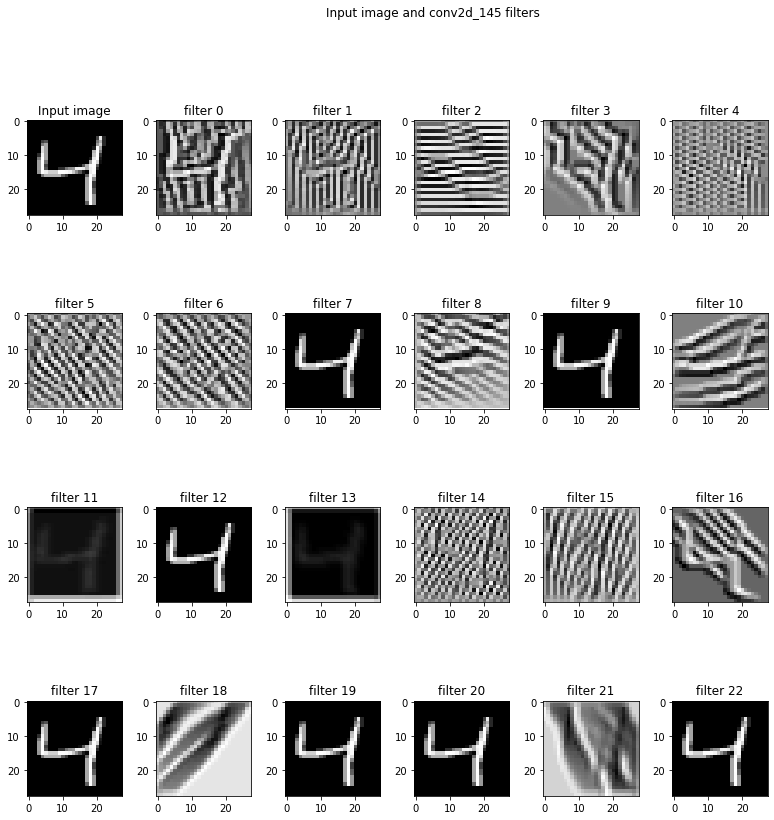

In [150]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_145'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    print(img.shape)
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()